In [19]:
import matplotlib.pyplot as plt
import numpy as np

Per Layer

In [20]:
def plot_comparison_barplot(data1, data2, data3, labels):
    y_pos = np.arange(len(labels))
    
    # Set the height of the bars
    bar_height = 0.275
    

    plt.figure(figsize=(10, 8))

    
    # Plotting the bars horizontally
    plt.barh(y_pos, data1, height=bar_height, label='Simple')
    plt.barh(y_pos + bar_height, data2, height=bar_height, label='Tandem')
    plt.barh(y_pos + 2 * bar_height, data3, height=bar_height, label='One Layer')
    
    # Set labels, title, and ticks on the y-axis
    plt.xlabel('MAE Loss (K)')
    plt.ylabel('Layer')
    plt.title('Comparison Bar Plot (lower is better)')
    plt.yticks(y_pos + bar_height, labels)
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.show()


In [21]:
# testing data
ff_layers = np.array([
    [3.0257139205932617, 6.502890110015869, 3.4729530811309814, 2.9172170162200928, 4.604684352874756, 3.835747718811035, 4.290509223937988, 3.2606351375579834, 3.377387285232544, 2.283905506134033, 0.9886979460716248],
    [2.8526625633239746, 6.336410045623779, 3.503333330154419, 3.183046579360962, 4.643794059753418, 3.8049778938293457, 4.249305248260498, 2.922045946121216, 3.317410945892334, 2.3578951358795166, 0.8712249994277954],
    [2.8483798503875732, 6.538963317871094, 3.428210973739624, 3.044593334197998, 4.598667144775391, 3.925963878631592, 4.28159761428833, 3.1239707469940186, 3.433483600616455, 2.281480550765991, 1.2895712852478027],
    [3.0128486156463623, 6.423159599304199, 3.424473762512207, 3.4704396724700928, 4.833381175994873, 3.9173290729522705, 4.389441967010498, 3.2324273586273193, 3.612516164779663, 2.6501805782318115, 1.1896398067474365],
    [2.862231969833374, 6.501178741455078, 3.233191967010498, 3.209338426589966, 4.6040873527526855, 3.894697427749634, 4.173834323883057, 3.0072824954986572, 3.3752474784851074, 2.4829139709472656, 0.899827241897583],
    [2.8197052478790283, 6.545750141143799, 3.488062620162964, 3.298793077468872, 4.829134941101074, 3.966043710708618, 4.3479485511779785, 3.045767307281494, 3.2959346771240234, 2.278667688369751, 0.9415783286094666],
    [2.3411824703216553, 6.582705497741699, 3.2588260173797607, 3.0134503841400146, 4.620622158050537, 3.9000191688537598, 4.057796001434326, 2.823974132537842, 3.4333548545837402, 2.116921901702881, 1.1934603452682495],
    [2.4729316234588623, 6.4025702476501465, 3.4465513229370117, 3.359489679336548, 4.752442359924316, 3.8091752529144287, 4.148719787597656, 3.2128069400787354, 3.395644426345825, 2.092533588409424, 1.058269739151001],
    [3.2270216941833496, 6.607059478759766, 3.4851531982421875, 3.18660044670105, 4.6021504402160645, 3.8571407794952393, 4.237827301025391, 2.848294973373413, 3.4064958095550537, 2.1523213386535645, 1.1598495244979858],
    [2.3814337253570557, 6.73715877532959, 3.460162401199341, 3.1371243000030518, 4.67780876159668, 3.920919179916382, 3.9626667499542236, 3.054877996444702, 3.2598583698272705, 2.1223936080932617, 0.7289648056030273]
])

ff = np.array([3.505485773086548, 3.4583733081817627, 3.5268075466156006, 3.6505305767059326, 3.4767117500305176, 3.532489776611328, 3.3947556018829346, 3.468285083770752, 3.524538040161133, 3.4039430618286133])
tandem =  np.array([5.0016722455826015, 5.024294497487302, 5.129032422951102, 4.936367820970939, 5.002455956745411, 4.991766180873902, 5.0223668080059305, 5.020854353050884, 5.101802151262269, 4.953453967722324])
one_layer =  np.array([3.9795089905912224, 3.7971093437888404, 3.7532224980267612, 3.991840503432534, 3.948444740338759, 3.9637020880525764, 3.973107175393538, 3.9528016177090732, 3.8851619308645073, 4.047852505337108])

In [22]:
ff_cols = []
for i in range(11):
    column = []
    for j in range(10):
        column.append(ff_layers[j][i])

    ff_cols.append(np.array(column))

In [23]:
layer_std = []
layer_mean = []
for col in ff_cols:
    layer_std.append(np.std(col))
    layer_mean.append(np.mean(col))

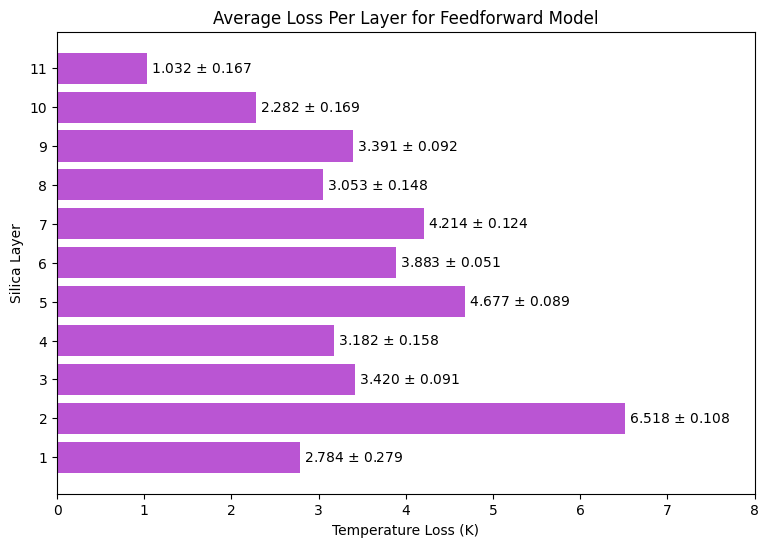

In [24]:
plt.figure(figsize=(9,6))
plt.title('Average Loss Per Layer for Feedforward Model')
plt.barh(range(1,12), layer_mean, color='mediumorchid')
plt.yticks(range(1,12))
plt.xlabel("Temperature Loss (K)")
plt.ylabel("Silica Layer")
plt.xlim(0,8)

for i, mean in enumerate(layer_mean):
    plt.text(mean, i + 1, f' {mean:.3f}' + r" $\pm$ " + f"{layer_std[i]:.3f}", ha='left', va='center')

plt.show()

Overall

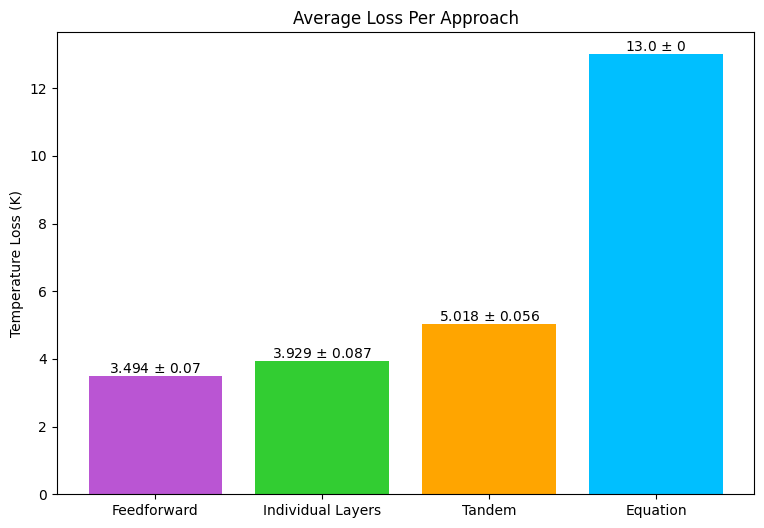

In [25]:
colors = ['mediumorchid', 'limegreen', 'orange', 'deepskyblue']
values = [sum(ff)/10, sum(one_layer)/10, sum(tandem)/len(tandem), 13]
x_labels = ['Feedforward', 'Individual Layers', 'Tandem', 'Equation']
stds = [np.std(ff), np.std(one_layer), np.std(tandem), 0]

plt.figure(figsize=(9,6))

plt.bar(x_labels, values, color=colors)

plt.ylabel('Temperature Loss (K)')
plt.title('Average Loss Per Approach')


# Function to add value labels to the bars
def add_value_labels(ax):
    i = 0
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{round(height, 3)}" + r" $\pm$ " + f"{round(stds[i], 3)}", 
                ha='center', va='bottom')
        i += 1

# Call the function to add value labels
add_value_labels(plt.gca())

plt.show()